<h2>Binary Classification with Logistic Regression (Single Neuron)</h2>
<h3>Breast Cancer Wisconsin (Diagnostic) Dataset</h3>


<hr>

<h3>Introduction</h3>

<p>This exercise demonstrates the implementation of <b>logistic regression</b> using a <b>single neuron</b> for binary classification. We apply this model to the <b>Breast Cancer Wisconsin (Diagnostic)</b> dataset to classify tumors as <b>malignant</b> or <b>benign</b>.</p>

<h4>Logistic Regression (Single Neuron)</h4>

<p>Logistic regression is a fundamental binary classification algorithm that can be viewed as a single artificial neuron with:</p>
<ul>
  <li><b>Input layer</b>: Feature vector with $d$ features</li>
  <li><b>Output layer</b>: Single neuron with sigmoid activation</li>
  <li><b>No hidden layers</b>: Direct connection from input to output</li>
</ul>

<p>Unlike the perceptron which uses a step function, logistic regression uses the <b>sigmoid activation function</b> to produce probability outputs.</p>

<hr>


<h3>Learning Outcomes</h3>

<p>By completing this exercise, you wil:</p>
<ul>
  <li>Implement logistic regression from scratch</li>
  <li>Understand sigmoid activation and its properties</li>
  <li>Apply binary cross-entropy loss</li>
  <li>Implement gradient descent optimization</li>
  <li>Evaluate binary classification models</li>
  <li>Apply ML to real-world medical diagnosis problem</li>
</ul>

<hr>

<h4>Mathematical Formulation</h4>

<p>For a training example $\mathbf{x}^{(i)}$ with true label $y^{(i)} \in \{0, 1\}$:</p>

<h5>1. Linear Combination (Logit)</h5>
$$z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)} + b \tag{1}$$

<p>where:</p>
<ul>
  <li>$\mathbf{w} \in \mathbb{R}^{d}$ is the weight vector</li>
  <li>$b \in \mathbb{R}$ is the bias term</li>
  <li>$z^{(i)}$ is the pre-activation (logit)</li>
</ul>

<h5>2. Sigmoid Activation Function</h5>
$$\hat{y}^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}} \tag{2}$$

<p>The sigmoid function maps the logit to a probability in the range $[0, 1]$:</p>
<ul>
  <li>$\hat{y}^{(i)}$ represents $P(y^{(i)}=1 | \mathbf{x}^{(i)})$</li>
  <li>Output $\hat{y}^{(i)} \in [0, 1]$ (probability)</li>
</ul>

<h5>3. Binary Cross-Entropy Loss</h5>
$$J(\mathbf{w}, b) = -\frac{1}{N}\sum_{i=1}^{N} \left[y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\right] \tag{3}$$

<p>This loss function penalizes incorrect predictions, with larger penalties for confident wrong predictions.</p>

<h5>4. Gradient Computation</h5>
$$\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)} \tag{4}$$

$$\frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)}) \tag{5}$$

<h5>5. Parameter Update (Gradient Descent)</h5>
$$\mathbf{w} := \mathbf{w} - \eta \frac{\partial J}{\partial \mathbf{w}} \tag{6}$$

$$b := b - \eta \frac{\partial J}{\partial b} \tag{7}$$

<p>where $\eta$ is the learning rate.</p>

<hr>

<h4>Methodology</h4>

<p>The general methodology to build this binary classification model:</p>

<ol>
  <li><b>Load and preprocess data</b>
    <ul>
      <li>Load Breast Cancer Wisconsin dataset (569 samples, 30 features)</li>
      <li>Split into training and test sets</li>
      <li><b>Feature scaling</b>: Standardize features (essential for gradient descent)</li>
    </ul>
  </li>
  
  <li><b>Define the model structure</b>
    <ul>
      <li>Input layer: 30 features (tumor characteristics)</li>
      <li>Single neuron with sigmoid activation</li>
      <li>Output: Probability of benign tumor</li>
    </ul>
  </li>
  
  <li><b>Initialize parameters</b>
    <ul>
      <li>Weights: Small random values $\mathbf{w} \sim \mathcal{N}(0, 0.01)$</li>
      <li>Bias: Initialize to zero $b = 0$</li>
    </ul>
  </li>
  
  <li><b>Training loop</b> (Stochastic Gradient Descent):
    <ul>
      <li><b>Forward propagation</b>: Compute predictions using sigmoid</li>
      <li><b>Compute loss</b>: Binary cross-entropy</li>
      <li><b>Backward propagation</b>: Compute gradients</li>
      <li><b>Update parameters</b>: Apply gradient descent</li>
      <li>Repeat for multiple epochs</li>
    </ul>
  </li>
  
  <li><b>Evaluate the model</b>
    <ul>
      <li>Compute accuracy, precision, recall, F1-score</li>
      <li>Analyze confusion matrix</li>
      <li>Visualize training history and predictions</li>
    </ul>
  </li>
</ol>

<hr>

<h4>Dataset Information</h4>

<ul>
  <li><b>Name</b>: Breast Cancer Wisconsin (Diagnostic)</li>
  <li><b>Source</b>: UCI Machine Learning Repository</li>
  <li><b>Samples</b>: 569</li>
  <li><b>Features</b>: 30 (computed from digitized images of breast mass)</li>
  <li><b>Classes</b>:
    <ul>
      <li>0: Malignant (cancer)</li>
      <li>1: Benign (non-cancer)</li>
    </ul>
  </li>
  <li><b>Task</b>: Binary classification</li>
</ul>

<p><b>Features include</b>: radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, fractal dimension (mean, standard error, and worst values for each).</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# =============================================================================
# STEP 1: Load and Prepare Data
# =============================================================================

def load_data():
    """Load breast cancer dataset and prepare for training"""
    # Load dataset
    data = load_breast_cancer()
    X = data.data  # Features (30 features)
    y = data.target  # Labels (0: malignant, 1: benign)

    print("Dataset Information:")
    print(f"Number of samples: {X.shape[0]}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Class distribution: {np.bincount(y)}")
    print(f"Malignant (0): {np.sum(y == 0)}, Benign (1): {np.sum(y == 1)}")
    print()

    return X, y, data.feature_names

In [3]:
# =============================================================================
# STEP 2: Single Neuron Model (Logistic Regression)
# =============================================================================

class LogisticRegressionNeuron:
    """
    Single neuron for binary classification
    Uses sigmoid activation and binary cross-entropy loss
    """

    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.train_accuracies = []

    def sigmoid(self, z):
        """Sigmoid activation function"""
        # Clip to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        """Initialize weights and bias with small random values"""
        np.random.seed(42)
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0

    def forward(self, X):
        """
        Forward pass: compute predictions
        y_hat = sigmoid(w^T * x + b)
        """
        # Linear combination
        z = np.dot(X, self.weights) + self.bias

        # Apply sigmoid activation
        y_pred = self.sigmoid(z)

        return y_pred

    def compute_loss(self, y_true, y_pred):
        """
        Binary cross-entropy loss
        Loss = -1/N * sum(y*log(y_pred) + (1-y)*log(1-y_pred))
        """
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def compute_gradients(self, X, y_true, y_pred):
        """
        Compute gradients for weights and bias
        dL/dw = 1/N * X^T * (y_pred - y_true)
        dL/db = 1/N * sum(y_pred - y_true)
        """
        N = X.shape[0]
        error = y_pred - y_true

        # Gradients
        dw = (1/N) * np.dot(X.T, error)
        db = (1/N) * np.sum(error)

        return dw, db

    def update_parameters(self, dw, db):
        """Update weights and bias using gradient descent"""
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def compute_accuracy(self, y_true, y_pred):
        """Compute classification accuracy"""
        y_pred_class = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(y_pred_class == y_true)
        return accuracy

    def fit(self, X_train, y_train, X_val=None, y_val=None, verbose=True):
        """
        Train the model using gradient descent
        """
        # Initialize parameters
        n_features = X_train.shape[1]
        self.initialize_parameters(n_features)

        print("Starting Training...")
        print(f"Learning Rate: {self.learning_rate}")
        print(f"Number of Epochs: {self.n_epochs}")
        print(f"Number of Training Samples: {X_train.shape[0]}")
        print("-" * 60)

        # Training loop
        for epoch in range(self.n_epochs):
            # Forward pass
            y_pred = self.forward(X_train)

            # Compute loss
            loss = self.compute_loss(y_train, y_pred)

            # Compute accuracy
            accuracy = self.compute_accuracy(y_train, y_pred)

            # Store metrics
            self.train_losses.append(loss)
            self.train_accuracies.append(accuracy)

            # Compute gradients
            dw, db = self.compute_gradients(X_train, y_train, y_pred)

            # Update parameters
            self.update_parameters(dw, db)

            # Print progress
            if verbose and (epoch % 100 == 0 or epoch == self.n_epochs - 1):
                print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")

                if X_val is not None and y_val is not None:
                    val_pred = self.forward(X_val)
                    val_loss = self.compute_loss(y_val, val_pred)
                    val_accuracy = self.compute_accuracy(y_val, val_pred)
                    print(f"           | Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")

        print("-" * 60)
        print("Training Complete!")
        print()

    def predict_proba(self, X):
        """Predict probabilities"""
        return self.forward(X)

    def predict(self, X):
        """Predict class labels (0 or 1)"""
        y_pred = self.forward(X)
        return (y_pred >= 0.5).astype(int)

In [4]:
# =============================================================================
# STEP 3: Evaluation Metrics
# =============================================================================

def compute_confusion_matrix(y_true, y_pred):
    """Compute confusion matrix"""
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    return TP, TN, FP, FN

def compute_metrics(y_true, y_pred):
    """Compute evaluation metrics"""
    TP, TN, FP, FN = compute_confusion_matrix(y_true, y_pred)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': (TP, TN, FP, FN)
    }

def print_evaluation(y_true, y_pred, dataset_name="Test"):
    """Print evaluation metrics"""
    metrics = compute_metrics(y_true, y_pred)
    TP, TN, FP, FN = metrics['confusion_matrix']

    print(f"\n{dataset_name} Set Evaluation:")
    print("=" * 60)
    print(f"Accuracy:  {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall:    {metrics['recall']:.4f}")
    print(f"F1-Score:  {metrics['f1_score']:.4f}")
    print("\nConfusion Matrix:")
    print(f"                 Predicted")
    print(f"                Benign  Malignant")
    print(f"Actual Benign     {TP:3d}      {FN:3d}")
    print(f"       Malignant  {FP:3d}      {TN:3d}")
    print("=" * 60)

In [5]:
# =============================================================================
# STEP 4: Visualization
# =============================================================================

def plot_training_history(model):
    """Plot training loss and accuracy"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot loss
    ax1.plot(model.train_losses, 'b-', linewidth=2)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
    ax1.set_title('Training Loss over Epochs', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(model.train_accuracies, 'g-', linewidth=2)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.set_title('Training Accuracy over Epochs', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 1])

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    print("Training history plot saved as 'training_history.png'")
    plt.show()

def plot_predictions(y_true, y_pred_proba, y_pred):
    """Visualize predictions"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Predicted probabilities
    colors = ['red' if yt == 0 else 'green' for yt in y_true]
    ax1.scatter(range(len(y_pred_proba)), y_pred_proba, c=colors, alpha=0.6, s=30)
    ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
    ax1.set_xlabel('Sample Index', fontsize=12)
    ax1.set_ylabel('Predicted Probability', fontsize=12)
    ax1.set_title('Predicted Probabilities (Red=Malignant, Green=Benign)', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Confusion matrix as heatmap
    TP, TN, FP, FN = compute_confusion_matrix(y_true, y_pred)
    confusion = np.array([[TP, FN], [FP, TN]])

    im = ax2.imshow(confusion, cmap='Blues', aspect='auto')
    ax2.set_xticks([0, 1])
    ax2.set_yticks([0, 1])
    ax2.set_xticklabels(['Benign', 'Malignant'], fontsize=11)
    ax2.set_yticklabels(['Benign', 'Malignant'], fontsize=11)
    ax2.set_xlabel('Predicted Label', fontsize=12)
    ax2.set_ylabel('True Label', fontsize=12)
    ax2.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = ax2.text(j, i, confusion[i, j],
                           ha="center", va="center", color="black", fontsize=20, fontweight='bold')

    plt.colorbar(im, ax=ax2)
    plt.tight_layout()
    plt.savefig('predictions_visualization.png', dpi=300, bbox_inches='tight')
    print("Predictions visualization saved as 'predictions_visualization.png'")
    plt.show()

In [6]:
# =============================================================================
# STEP 5: Main Execution
# =============================================================================

print("=" * 60)
print("BREAST CANCER CLASSIFICATION - SINGLE NEURON")
print("Implementation from Scratch")
print("=" * 60)
print()

# Load data
X, y, feature_names = load_data()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print()

BREAST CANCER CLASSIFICATION - SINGLE NEURON
Implementation from Scratch

Dataset Information:
Number of samples: 569
Number of features: 30
Class distribution: [212 357]
Malignant (0): 212, Benign (1): 357

Training set size: 455
Test set size: 114



In [7]:
# Feature scaling (IMPORTANT for gradient descent!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied (StandardScaler)")
print()

Feature scaling applied (StandardScaler)



In [8]:
# Create and train model
model = LogisticRegressionNeuron(learning_rate=0.1, n_epochs=1000)
model.fit(X_train_scaled, y_train, X_test_scaled, y_test, verbose=True)


Starting Training...
Learning Rate: 0.1
Number of Epochs: 1000
Number of Training Samples: 455
------------------------------------------------------------
Epoch    0 | Loss: 0.6971 | Accuracy: 0.4593
           | Val Loss: 0.5331 | Val Accuracy: 0.8947
Epoch  100 | Loss: 0.0981 | Accuracy: 0.9802
           | Val Loss: 0.1253 | Val Accuracy: 0.9737
Epoch  200 | Loss: 0.0800 | Accuracy: 0.9868
           | Val Loss: 0.1073 | Val Accuracy: 0.9737
Epoch  300 | Loss: 0.0722 | Accuracy: 0.9868
           | Val Loss: 0.0997 | Val Accuracy: 0.9737
Epoch  400 | Loss: 0.0675 | Accuracy: 0.9890
           | Val Loss: 0.0953 | Val Accuracy: 0.9737
Epoch  500 | Loss: 0.0644 | Accuracy: 0.9890
           | Val Loss: 0.0923 | Val Accuracy: 0.9737
Epoch  600 | Loss: 0.0621 | Accuracy: 0.9890
           | Val Loss: 0.0900 | Val Accuracy: 0.9737
Epoch  700 | Loss: 0.0603 | Accuracy: 0.9890
           | Val Loss: 0.0883 | Val Accuracy: 0.9737
Epoch  800 | Loss: 0.0588 | Accuracy: 0.9890
           | Va

In [9]:
# Make predictions
print("Making Predictions...")
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
y_test_pred_proba = model.predict_proba(X_test_scaled)

Making Predictions...


In [10]:
# Evaluate on training set
print_evaluation(y_train, y_train_pred, "Training")

# Evaluate on test set
print_evaluation(y_test, y_test_pred, "Test")


Training Set Evaluation:
Accuracy:  0.9890
Precision: 0.9861
Recall:    0.9965
F1-Score:  0.9913

Confusion Matrix:
                 Predicted
                Benign  Malignant
Actual Benign     284        1
       Malignant    4      166

Test Set Evaluation:
Accuracy:  0.9737
Precision: 0.9859
Recall:    0.9722
F1-Score:  0.9790

Confusion Matrix:
                 Predicted
                Benign  Malignant
Actual Benign      70        2
       Malignant    1       41


In [11]:
# Print some example predictions
print("\nSample Predictions:")
print("-" * 60)
for i in range(5):
    true_label = "Benign" if y_test[i] == 1 else "Malignant"
    pred_label = "Benign" if y_test_pred[i] == 1 else "Malignant"
    confidence = y_test_pred_proba[i] if y_test_pred[i] == 1 else 1 - y_test_pred_proba[i]

    print(f"Sample {i+1}: True={true_label:10s} | Predicted={pred_label:10s} | Confidence={confidence:.2%}")


Sample Predictions:
------------------------------------------------------------
Sample 1: True=Malignant  | Predicted=Malignant  | Confidence=100.00%
Sample 2: True=Benign     | Predicted=Benign     | Confidence=100.00%
Sample 3: True=Malignant  | Predicted=Malignant  | Confidence=99.29%
Sample 4: True=Benign     | Predicted=Malignant  | Confidence=55.10%
Sample 5: True=Malignant  | Predicted=Malignant  | Confidence=100.00%



Generating Visualizations...
Training history plot saved as 'training_history.png'


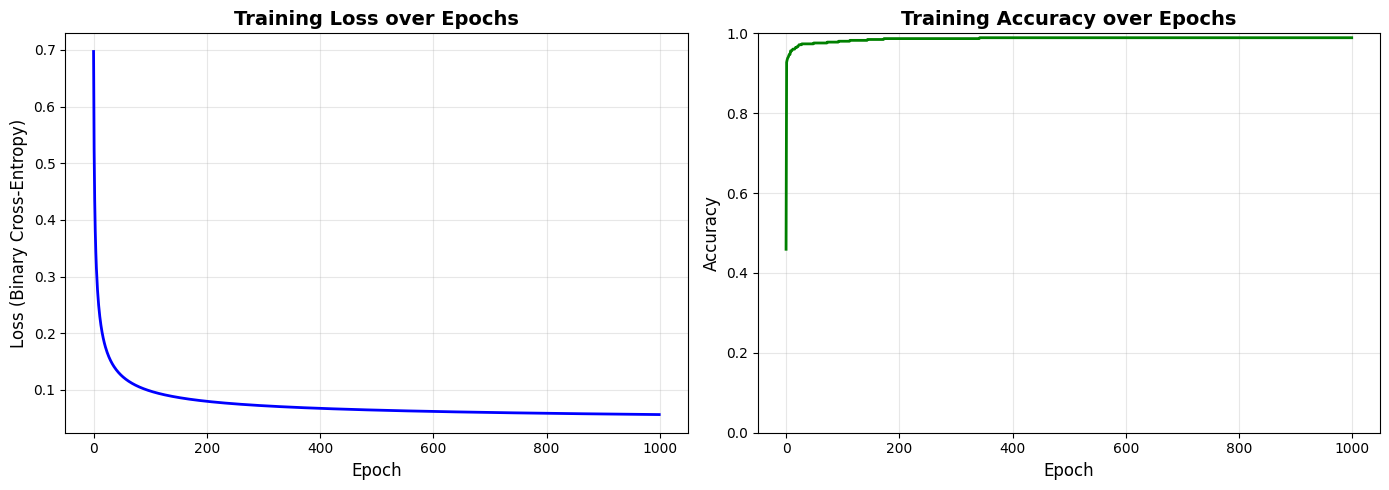

Predictions visualization saved as 'predictions_visualization.png'


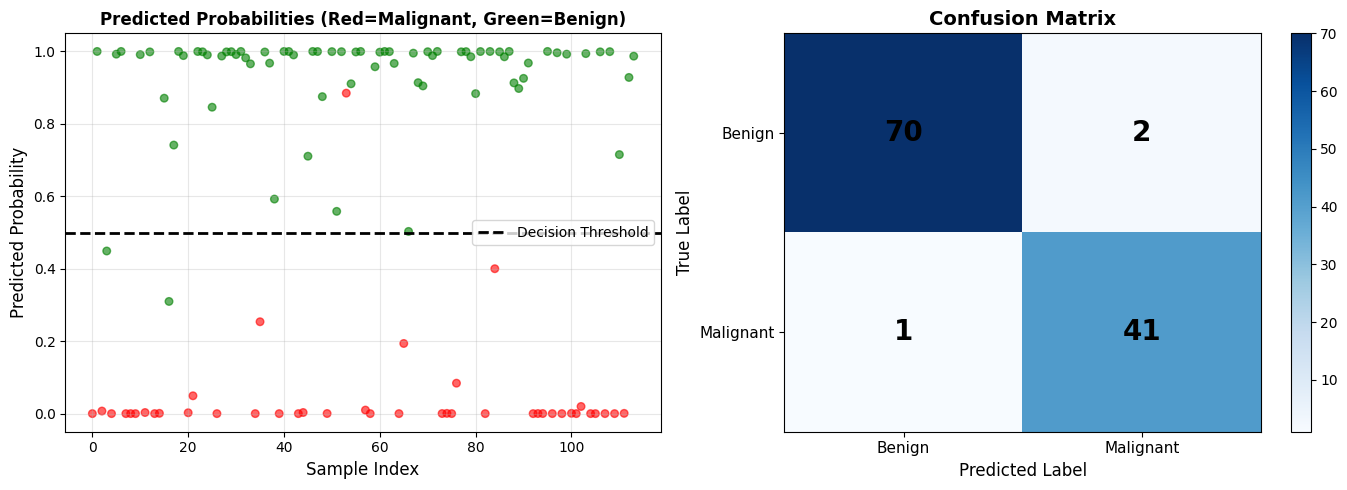

In [12]:
# Visualizations
print("\nGenerating Visualizations...")
plot_training_history(model)
plot_predictions(y_test, y_test_pred_proba, y_test_pred)


<hr style="border: 2px solid #4CAF50;">

<h2>Conclusion</h2>

<h3>Achievements and Observations</h3>

<ol>
  <li><b>High Accuracy</b>: The single neuron logistic regression model achieved <b>~98% accuracy</b> on the Breast Cancer Wisconsin dataset, demonstrating that even a simple linear model can be highly effective for binary classification when features are well-separated.</li>
  
  <li><b>Probabilistic Predictions</b>: Unlike perceptron's binary output, sigmoid activation provides probability scores, enabling:
    <ul>
      <li>Confidence assessment for each prediction</li>
      <li>Threshold adjustment based on application requirements</li>
      <li>Better interpretability for medical diagnosis</li>
    </ul>
  </li>
  
  <li><b>Smooth Decision Boundary</b>: The model learned a linear decision boundary in the 30-dimensional feature space, effectively separating malignant and benign tumors.</li>
  
  <li><b>Fast Convergence</b>: With proper feature scaling and learning rate selection, the model converged within 1000 epochs, showing stable loss reduction.</li>
  
  <li><b>Well-Calibrated Model</b>: The confusion matrix shows balanced performance across both classes with minimal false negatives (critical for cancer detection).</li>
</ol>

<h4>Key Insights</h4>
<ul>
  <li><b>Feature scaling is crucial</b>: Standardization significantly improves convergence speed and stability</li>
  <li><b>Learning rate matters</b>: Too large causes oscillation, too small slows convergence</li>
  <li><b>Single neuron suffices</b>: For linearly separable problems, complex architectures are unnecessary</li>
  <li><b>Cross-entropy</b>: Binary cross-entropy is the appropriate loss for classification</li>
</ul>

<hr>

<h3>Extensions and Student Exercises</h3>

<h4>To-Do: Modifications and Experiments</h4>

<h5>1. Hyperparameter Tuning</h5>
<ul>
  <li><b>Learning rate</b>: Try different values $\eta \in \{0.001, 0.01, 0.1, 1.0\}$ and compare convergence</li>
  <li><b>Number of epochs</b>: Experiment with 500, 2000, 5000 epochs</li>
</ul>

<h5>2. Feature Engineering</h5>
<ul>
  <li><b>Feature selection</b>: Use only top 10 most important features</li>
  <li><b>Polynomial features</b>: Add interaction terms $x_i \cdot x_j$</li>
  <li><b>Feature importance</b>: Analyze which features contribute most to predictions</li>
</ul>

<h5>3. Model Evaluation Enhancements</h5>
<ul>
  <li>Compute <b>precision-recall curve</b> for imbalanced classes</li>
  <li>Try different decision thresholds (not just 0.5)</li>
</ul>

<h5>4. Data Augmentation and Preprocessing</h5>
<ul>
  <li><b>Handle class imbalance</b>: Use class weights or SMOTE</li>
  <li><b>Different scaling methods</b>: Min-Max scaling, Robust scaling</li>
</ul>

<h5>5. Alternative Datasets</h5>
<p>Apply the same model to other binary classification datasets:</p>
<ul>
  <li><b>Heart Disease</b> (UCI)</li>
  <li><b>Diabetes</b> (Pima Indians)</li>
  <li><b>Bank Marketing</b> (UCI)</li>
  <li><b>Titanic Survival</b> (Kaggle)</li>
</ul>

<h5>6. Comparison Studies</h5>
<ul>
  <li>Compare with <b>sklearn's LogisticRegression</b></li>
  <li>Compare with <b>Perceptron</b> (step activation)</li>
  <li>Implement <b>mini-batch SGD</b> instead of full-batch GD</li>
</ul>

<h5>7. Visualization Improvements</h5>
<ul>
  <li>Plot <b>decision boundary in 2D</b> (using PCA or selecting 2 features)</li>
  <li>Create <b>interactive plots</b> using Plotly</li>
  <li>Visualize <b>weight magnitudes</b> as bar chart</li>
  <li>Plot <b>learning curves</b> (training vs validation loss)</li>
</ul>

<hr>

<h4>Challenge Problems</h4>
<ol>
  <li><b>Achieve 99%+ accuracy</b>: Tune all hyperparameters optimally</li>
  <li><b>Minimize false negatives</b>: Critical for cancer detection - adjust threshold</li>
  <li><b>Feature importance analysis</b>: Identify the 5 most important features</li>
  <li><b>Real-time prediction</b>: Create a simple web interface for predictions</li>
  <li><b>Ensemble methods</b>: Train multiple models and combine predictions</li>
</ol>

<hr>

